In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

### Logistic Regression

Is a discriminative model that assigns discrete classes to a set of observations (decision boundary between the classes)
 - No distribution assumption on the data points as opposed to Naive Bayes

As this is a binary classifier, Logistic Regression uses a link function to transform the features and to bound the output between [0, 1]
 - Sigmoid function: $f(x) = \frac{1}{1+e^{-wx+b}}$

Thus, our logistic model looks like the following: $f_{w,b}(x) = \frac{1}{1+e^{-wx+b}}$

What happens when the denominator $-wx+b$ is largely negative or largely positive?
 - When the **denominator is largely positive**, then the $P(y = 1 | x)$ is **close to 0**
 - When the **denominator is largely negative**, or is one, then $P(y = 1 | x)$ is **closer to one**


We do not attempt to model the data's distribution $P(X | Y)$, rather we model $P(Y | X)$ directly given the parameters $w, b$. 

_Goal_: Find $w, b$ that maximize the likelihood (log-likelihood) of producing our data using Gradient Descent

 - Log-likelihood = $\sum_{i=1}^Ny_iw^Tx_i-log(1 + e^{w^Tx_i})$

In [2]:
fish = pd.read_csv('/Users/gabestechschulte/Downloads/Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
fish.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [4]:
fish_binary = fish[(fish.Species == 'Bream') | (fish.Species == 'Roach')]

In [5]:
X = fish_binary[['Weight','Height']].values
X.shape

(55, 2)

In [18]:
y = fish_binary.Species.apply(lambda x: 1 if (x == 'Bream') else 0).values

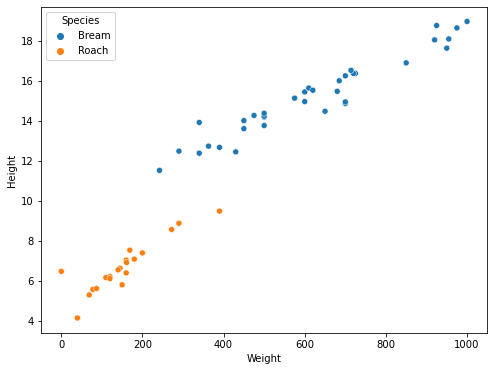

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = fish_binary.Weight, y = fish_binary.Height, hue = fish_binary.Species)
plt.show()

In [8]:
class LogisticRegression():
    
    def __init__(self, X, y, intercept=False, lr=0.01, iterations=100):
        
        self.lr = lr
        self.iterations = iterations
        self.y = y
        
        if intercept == True:
            self.intercept = np.ones((X.shape[0], 1))
            self.X = np.hstack((self.intercept, X))
        else:
            self.X = X
        
    def sigmoid(self, scores):
        return 1 / (1 + np.exp(-scores))
    
    def cost_func(self, X, y, weights):
        # Feature times its weight parameter
        scores = np.dot(X, weights)
        # "Push" the scores through the denominator of our sigmoid function and compute the probability of observing
        # 1 = Bream or 0 = Roach
        predict_1 = y * np.log(self.sigmoid(scores))
        predict_0 = (1 - y) * np.log(1 - self.sigmoid(scores))
        # -sum is an iterable that puts a negative sign in front of the summed values
        return -sum(predict_1 + predict_0) / len(X)
    
    def log_likelihood(self, X, y, w):
        scores = np.dot(X, w)
        ll = np.sum(y * scores - np.log(1 + np.exp(scores)))
        return ll
    
    def training(self):
        # Initialize weights; X.shape[1] grabs 2 element of shape list to determine how many features are used in the model
        weights = np.zeros(self.X.shape[1])
        loss = {}
        log_likeli = {}
        N = len(self.X)
        
        for train in range(self.iterations):  
            ## Gradient Descent ##
            
            # Predictions = Push scores through the sigmoid function
            y_hat = self.sigmoid(np.dot(self.X, weights))
            # Gradient Descent to update weights based on our error (minimize error) and update the weights
            weights -= self.lr * np.dot(X.T,  y_hat - y) / N            
            # Saving Progress
            loss.update({train: self.cost_func(X, y, weights)}) 
            log_likeli.update({train: self.log_likelihood(self.X, self.y, weights)})
            
        self.weights = weights
        self.loss = loss
        
        return self.weights, self.loss, log_likeli
    
    def predict(self, X):
        # Computing "score" - dot product between features and final weight parameter
        score = np.dot(X, self.weights)
        # Discretize the returned probabilities 
        return [1 if i > 0.5 else 0 for i in self.sigmoid(score)]

In [9]:
# Too large or small of a step size does not lead to convergence
lr = LogisticRegression(X=X, y=y, intercept=False, lr=1e-4, iterations=7000)
weights, loss, log_likeli = lr.training()
preds = lr.predict(X)

In [10]:
weights

array([ 0.01047341, -0.23802817])

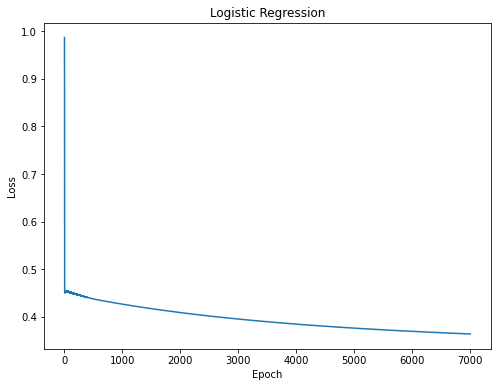

In [20]:
# sorted by key, return a list of tuples and unpack the list of pairs into two tuples
xax, yax = zip(*sorted(loss.items()))
plt.figure(figsize=(8, 6))
sns.lineplot(x = xax, y = yax)
plt.title('Logistic Regression')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Text(0.5, 1.0, 'Log-Likelihood')

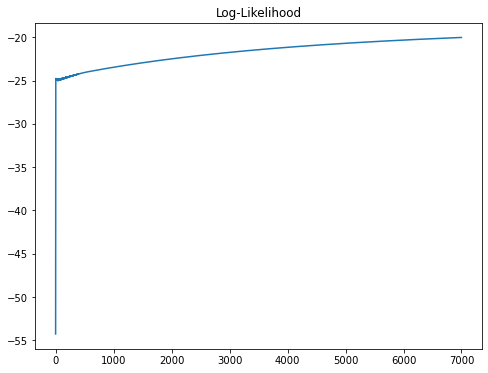

In [21]:
x2, y2 = zip(*sorted(log_likeli.items()))
plt.figure(figsize=(8, 6))
sns.lineplot(x = x2, y = y2)
plt.title('Log-Likelihood')

In [27]:
print('Accuracy of model: {}'.format((preds == y).sum() / len(preds)))

Accuracy of model: 0.8181818181818182


### Scikit Learn Comparison

In [ ]:
#sk_lr.coef_, sk_lr.score(X, y)